EXPLORING CRIME RATES BY RACE IN THE UNITED STATES

INTRODUCTION

The incarcerated population of the US has seen a dramatic increase from the mid-1970s (Weidner & Schultz, 2019). However, there is a disparity between incarceration rates by race; for example, Black and Hispanic individuals are incarcerated at six and three times the rate of Whites, respectively, in state and federal prisons. As a result, we are interested in investigating the relationship between different communities and their crime rates by violent and non-violent types. From that, we can look closer into the demographic of each community and further examine the relationships between crime and race. The big question to be answered is therefore, “Can the ratio of violent crime rate to non-violent crime rate in a community be predicted based on the racial characteristics of the community?”.

In order to answer this question, the "Communities and Crimes" dataset from the UCI Machine Learning Repository was chosen, which contains various socio-economic, law enforcement and crime statistics from the 1990 US Census, 1990 US LEMAS survey and 1995 FBI UCR (Dua & Graff, 2019). The data is unnormalized and observations are listed at the community level, which includes cities, townships, and boroughs. The scope of the variables also needs to be addressed, due to the multitude of crime types that exist. For this dataset, violent crimes consist of murder, rape, robbery, and assault. Non-violent crimes include burglary, larceny, auto theft and arson.

METHODOLOGY

We aim to predict the ratio of violent to non-violent crime rate by race, hence our target and predictor variables will be the former and the latter, respectively. Due to the numerical variables, regression is appropriate for this question. A scatter plot will be used to visualize the relationship between the two chosen variables. The predictor variable will be placed on the x-axis and the target variable will be placed on the y-axis. Regression can then be performed to predict the y value in relation to a given value of x. 

PRELIMINARY EXPLORATORY DATA ANALYSIS

We begin by loading in the necessary packages for data wrangling and visualization, and setting the seed for our analysis.

In [1]:
# Loads packages
library(tidyverse)
library(repr)
library(tidymodels)

# Set seed
set.seed(100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Next, we need to read in the data, using the column names from the attribute information for the dataset (Dua & Graff, 2019).

In [2]:
# Vector for column names
colnames <- c("communityname",
                "state",
                "countyCode",
                "communityCode",
                "fold",
                "population",
                "householdsize",
                "racepctblack",
                "racePctWhite",
                "racePctAsian",
                "racePctHisp",
                "agePct12t21",
                "agePct12t29",
                "agePct16t24",
                "agePct65up",
                "numbUrban",
                "pctUrban",
                "medIncome",
                "pctWWage",
                "pctWFarmSelf",
                "pctWInvInc",
                "pctWSocSec",
                "pctWPubAsst",
                "pctWRetire",
                "medFamInc",
                "perCapInc",
                "whitePerCap",
                "blackPerCap",
                "indianPerCap",
                "AsianPerCap",
                "OtherPerCap",
                "HispPerCap",
                "NumUnderPov",
                "PctPopUnderPov",
                "PctLess9thGrade",
                "PctNotHSGrad",
                "PctBSorMore",
                "PctUnemployed",
                "PctEmploy",
                "PctEmplManu",
                "PctEmplProfServ",
                "PctOccupManu",
                "PctOccupMgmtProf",
                "MalePctDivorce",
                "MalePctNevMarr",
                "FemalePctDiv",
                "TotalPctDiv",
                "PersPerFam",
                "PctFam2Par",
                "PctKids2Par",
                "PctYoungKids2Par",
                "PctTeen2Par",
                "PctWorkMomYoungKids",
                "PctWorkMom",
                "NumKidsBornNeverMar",
                "PctKidsBornNeverMar",
                "NumImmig",
                "PctImmigRecent",
                "PctImmigRec5",
                "PctImmigRec8",
                "PctImmigRec10",
                "PctRecentImmig",
                "PctRecImmig5",
                "PctRecImmig8",
                "PctRecImmig10",
                "PctSpeakEnglOnly",
                "PctNotSpeakEnglWell",
                "PctLargHouseFam",
                "PctLargHouseOccup",
                "PersPerOccupHous",
                "PersPerOwnOccHous",
                "PersPerRentOccHous",
                "PctPersOwnOccup",
                "PctPersDenseHous",
                "PctHousLess3BR",
                "MedNumBR",
                "HousVacant",
                "PctHousOccup",
                "PctHousOwnOcc",
                "PctVacantBoarded",
                "PctVacMore6Mos",
                "MedYrHousBuilt",
                "PctHousNoPhone",
                "PctWOFullPlumb",
                "OwnOccLowQuart",
                "OwnOccMedVal",
                "OwnOccHiQuart",
                "OwnOccQrange",
                "RentLowQ",
                "RentMedian",
                "RentHighQ",
                "RentQrange",
                "MedRent",
                "MedRentPctHousInc",
                "MedOwnCostPctInc",
                "MedOwnCostPctIncNoMtg",
                "NumInShelters",
                "NumStreet",
                "PctForeignBorn",
                "PctBornSameState",
                "PctSameHouse85",
                "PctSameCity85",
                "PctSameState85",
                "LemasSwornFT",
                "LemasSwFTPerPop",
                "LemasSwFTFieldOps",
                "LemasSwFTFieldPerPop",
                "LemasTotalReq",
                "LemasTotReqPerPop",
                "PolicReqPerOffic",
                "PolicPerPop",
                "RacialMatchCommPol",
                "PctPolicWhite",
                "PctPolicBlack",
                "PctPolicHisp",
                "PctPolicAsian",
                "PctPolicMinor",
                "OfficAssgnDrugUnits",
                "NumKindsDrugsSeiz",
                "PolicAveOTWorked",
                "LandArea",
                "PopDens",
                "PctUsePubTrans",
                "PolicCars",
                "PolicOperBudg",
                "LemasPctPolicOnPatr",
                "LemasGangUnitDeploy",
                "LemasPctOfficDrugUn",
                "PolicBudgPerPop",
                "murders",
                "murdPerPop",
                "rapes",
                "rapesPerPop",
                "robberies",
                "robbbPerPop",
                "assaults",
                "assaultPerPop",
                "burglaries",
                "burglPerPop",
                "larcenies",
                "larcPerPop",
                "autoTheft",
                "autoTheftPerPop",
                "arsons",
                "arsonsPerPop",
                "ViolentCrimesPerPop",
                "nonViolPerPop")

In [3]:
# Reads data in and specifies column names
crime <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt",
                  col_names = colnames)
                                
crime

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 2215 Columns: 147
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (42): communityname, state, countyCode, communityCode, LemasSwornFT, Le...
dbl (105): fold, population, householdsize, racepctblack, racePctWhite, race...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,⋯,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,⋯,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,⋯,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,⋯,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,⋯,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
Springfieldcity,MO,?,?,1,140494,2.45,2.51,95.65,0.90,⋯,2094,1386.46,7690,5091.64,454,300.6,134,88.72,442.95,6867.42
Norwoodtown,MA,21,50250,1,28700,2.60,1.60,96.57,1.47,⋯,110,372.09,288,974.19,144,487.1,17,57.5,226.63,1890.88
Andersoncity,IN,?,?,1,59459,2.45,14.20,84.87,0.40,⋯,608,997.6,2250,3691.79,125,205.1,9,14.77,439.73,4909.26
Fargocity,ND,17,25700,1,74111,2.46,0.35,97.11,1.25,⋯,425,532.66,3149,3946.71,206,258.18,8,10.03,115.31,4747.58


As our analysis will only consist of the ratio of violent crime rate to non-violent crime rate, the columns for the individual crimes can be ignored in favour of the total violent and non-violent rates per capita. We also will select the population percentages by race, as these will be our predictor variables. Additionally, for the sake of readability, the names of the communities and their states will be included.

In [4]:
crime_selected <- crime |>
                    select(communityname, state, racepctblack:racePctHisp, ViolentCrimesPerPop, nonViolPerPop)
crime_selected

communityname,state,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop,nonViolPerPop
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
BerkeleyHeightstownship,NJ,1.37,91.78,6.50,1.88,41.02,1394.59
Marpletownship,PA,0.80,95.57,3.44,0.85,127.56,1955.95
Tigardcity,OR,0.74,94.33,3.43,2.35,218.59,6167.51
Gloversvillecity,NY,1.70,97.35,0.50,0.70,306.64,?
Bemidjicity,MN,0.53,89.16,1.17,0.52,?,9988.79
Springfieldcity,MO,2.51,95.65,0.90,0.95,442.95,6867.42
Norwoodtown,MA,1.60,96.57,1.47,1.10,226.63,1890.88
Andersoncity,IN,14.20,84.87,0.40,0.63,439.73,4909.26
Fargocity,ND,0.35,97.11,1.25,0.73,115.31,4747.58


The ratio of the violent crime rate to the non-violent crime rate can be calculated by dividing the violent crime rate by the non-violent crime rate. However, two columns are of the character type—they need to be converted to the double type as the values contain decimals. After this is performed, the ratio can be calculated.

In [5]:
crime_w_ratio <- crime_selected |>
                mutate(ViolentCrimesPerPop = as.numeric(ViolentCrimesPerPop),
                       nonViolPerPop = as.numeric(nonViolPerPop)) |>
                mutate(crime_ratio = ViolentCrimesPerPop / nonViolPerPop)

crime_w_ratio

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


communityname,state,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop,nonViolPerPop,crime_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BerkeleyHeightstownship,NJ,1.37,91.78,6.50,1.88,41.02,1394.59,0.02941366
Marpletownship,PA,0.80,95.57,3.44,0.85,127.56,1955.95,0.06521639
Tigardcity,OR,0.74,94.33,3.43,2.35,218.59,6167.51,0.03544218
Gloversvillecity,NY,1.70,97.35,0.50,0.70,306.64,NA,NA
Bemidjicity,MN,0.53,89.16,1.17,0.52,NA,9988.79,NA
Springfieldcity,MO,2.51,95.65,0.90,0.95,442.95,6867.42,0.06450021
Norwoodtown,MA,1.60,96.57,1.47,1.10,226.63,1890.88,0.11985425
Andersoncity,IN,14.20,84.87,0.40,0.63,439.73,4909.26,0.08957154
Fargocity,ND,0.35,97.11,1.25,0.73,115.31,4747.58,0.02428816


To perform regression, the dataset needs to be split into training and testing datasets. We will set aside 75% of our data to be our training dataset, and specify the crime_ratio column to be our target variable.

In [6]:
crime_split <- crime_w_ratio |>
                initial_split(prop = 0.75, strata = crime_ratio)

crime_training <- training(crime_split)
crime_testing <- testing(crime_split)

To obtain a general overview of the training dataset and help build the model, summary statistics will be useful. We will exclude observations with missing values, thus, finding the number of observations with missing values will help us ensure that there is a sufficient quantity of data to train the model. It would also be helpful to find the mean and range of the racial percentages and crime_ratio column, as an uneven distribution of data will affect the mean of the nearest k neighbours, and therefore the regression results. It may also be interesting to determine the count of community types; more larger communities lack a majority racial group compared to smaller communities (Farrell) while communities with more visitors tend to have higher crime rates (Dua & Graff, 2019) — this will be considered in the evaluation.

To begin, we apply the filter_all function to subset all rows with missing values, and obtain the number of rows.

In [7]:
cols <- colnames(crime_training)

missing_values <- crime_training |>
                    filter_all(any_vars(is.na(.))) |>
                    summarize(missing = n())
missing_values

missing
<int>
231


In order to calculate the mean and range, we filter out rows with missing values, and apply the map_dfr function to obtain a new dataframe with the calculated means, maximums, and minimums.

In [8]:
crime_data <- crime_training |>
                filter_all(all_vars(!is.na(.)))

crime_data

variable_mean <- crime_data |>
                    select(racepctblack:racePctHisp, crime_ratio) |>
                    map_dfr(mean, na.rm = TRUE) |>
                    rename(racepctblack__mean = racepctblack,
                           racePctWhite__mean = racePctWhite,
                           racePctAsian__mean = racePctAsian,
                           racePctHisp__mean = racePctHisp,
                           crime_ratio__mean = crime_ratio)

variable_mean

variable_max <- crime_data |>
                    select(racepctblack:racePctHisp, crime_ratio) |>
                    map_dfr(max, na.rm = TRUE) |>
                    rename(racepctblack__max = racepctblack,
                           racePctWhite__max = racePctWhite,
                           racePctAsian__max = racePctAsian,
                           racePctHisp__max = racePctHisp,
                           crime_ratio__max = crime_ratio)

variable_max

variable_min <- crime_data |>
                    select(racepctblack:racePctHisp, crime_ratio) |>
                    map_dfr(min, na.rm = TRUE) |>
                    rename(racepctblack__min = racepctblack,
                           racePctWhite__min = racePctWhite,
                           racePctAsian__min = racePctAsian,
                           racePctHisp__min = racePctHisp,
                           crime_ratio__min = crime_ratio)
variable_min



communityname,state,racepctblack,racePctWhite,racePctAsian,racePctHisp,ViolentCrimesPerPop,nonViolPerPop,crime_ratio
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BerkeleyHeightstownship,NJ,1.37,91.78,6.50,1.88,41.02,1394.59,0.029413663
Tigardcity,OR,0.74,94.33,3.43,2.35,218.59,6167.51,0.035442180
Fargocity,ND,0.35,97.11,1.25,0.73,115.31,4747.58,0.024288164
Enfieldtown,CT,2.65,95.72,1.04,2.28,89.94,3130.42,0.028730969
Lebanoncity,NH,0.41,97.55,1.55,0.91,145.20,5461.00,0.026588537
Gorhamtown,ME,0.37,98.84,0.40,0.45,16.72,919.73,0.018179248
Paragouldcity,AR,0.09,99.39,0.18,0.51,92.91,3121.66,0.029763011
Marioncity,OH,4.22,94.72,0.45,0.85,212.87,6403.36,0.033243485
OrmondBeachcity,FL,3.52,95.13,1.03,1.70,142.70,4091.83,0.034874372


racepctblack__mean,racePctWhite__mean,racePctAsian__mean,racePctHisp__mean,crime_ratio__mean
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9.1369,83.46732,2.894003,8.847936,0.1085395


racepctblack__max,racePctWhite__max,racePctAsian__max,racePctHisp__max,crime_ratio__max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
89.95,99.53,57.46,95.29,0.7016389


racepctblack__min,racePctWhite__min,racePctAsian__min,racePctHisp__min,crime_ratio__min
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,7.21,0.06,0.12,0.002784566


Upon inspecting the crime_data table, the community names contain one of: borough, town, township, and city. Hence, we can use the str_detect function to filter for rows matching the respective characters, and apply the summarize function to the result to obtain the count.

In [9]:
borough_count <- crime_data |>
                filter(str_detect(communityname, "borough")) |>
                summarize(borough_count = n())

borough_count

town_count <- crime_data |>
                filter(str_detect(communityname, "town") & !str_detect(communityname, "township")) |>
                summarize(town_count = n())

town_count

township_count <- crime_data |>
                filter(str_detect(communityname, "township")) |>
                summarize(township_count = n())

township_count

city_count <- crime_data |>
                filter(str_detect(communityname, "city")) |>
                summarize(city_count = n())

city_count

borough_count
<int>
64


town_count
<int>
203


township_count
<int>
130


city_count
<int>
1040


In [10]:
crime_summary_1 <- tibble(variable_mean, variable_max, variable_min) |>
                pivot_longer(cols = everything(),
                             names_to = "metric",
                             values_to = "value") |>
                separate(col = metric,
                         into = c("variable", "metric"),
                         sep = "__") |>
                pivot_wider(names_from = metric,
                            values_from = value)
                

crime_summary_1

crime_summary_2 <- tibble(city_count, township_count, town_count, borough_count, missing_values)

crime_summary_2

variable,mean,max,min
<chr>,<dbl>,<dbl>,<dbl>
racepctblack,9.1368999,89.9500000,0.000000000
racePctWhite,83.4673198,99.5300000,7.210000000
racePctAsian,2.8940028,57.4600000,0.060000000
racePctHisp,8.8479356,95.2900000,0.120000000
crime_ratio,0.1085395,0.7016389,0.002784566


city_count,township_count,town_count,borough_count,missing
<int>,<int>,<int>,<int>,<int>
1040,130,203,64,231


From the above tables, we note that only 231 rows have missing data, meaning that the quantity of data will be sufficient. Whites have the highest mean, while Asians have the lowest mean and smallest range. The range for African Americans, Hispanics and the crime ratio seem to be quite large compared to their relatively low means—visualizations could help determine whether the maximums and minimums are outliers. Note that the sum of the means for race is not 100%, meaning that some of the population may identify as more than one race. However, the difference is small, and can be ignored. Cities also seem to be the dominant community type, which may or may not affect the findings.

We now visualize the crime ratio against racial percentages for every race in scatter plots below. Note that from the summary tables above, the means for African American, Asian, and Hispanics are close to the minimums while the mean for Whites is close to the maximum. This means that a large proportion of the data will be clustered, however, we can avoid overplotting by applying a continous transformation to the x-axis for Whites and a logarithmic transformation for the other groups.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 231 rows containing missing values (geom_point).”


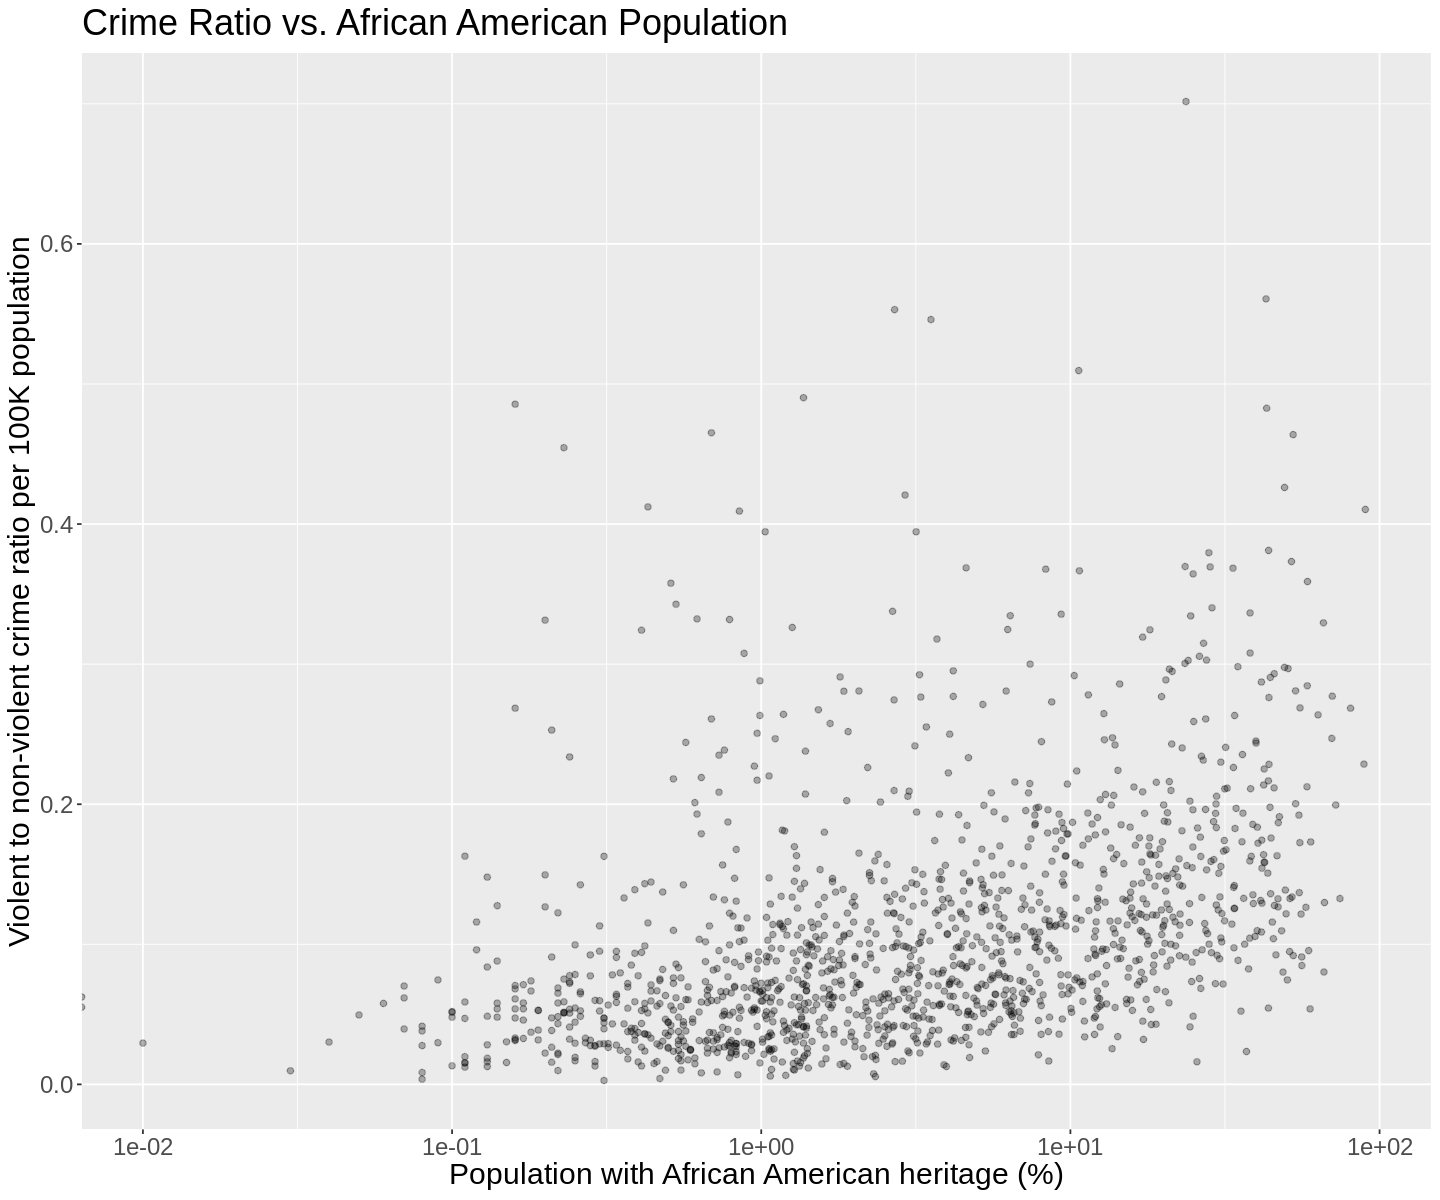

In [20]:
options(repr.plot.width = 12, repr.plot.height = 10)
crime_plot_black <- crime_training |>
                    ggplot(aes(x = racepctblack, y = crime_ratio)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with African American heritage (%)", y = "Violent to non-violent crime ratio per 100K population", title = "Crime Ratio vs. African American Population") +
                    theme(text = element_text(size = 18)) +
                    scale_x_log10()

crime_plot_black

The overall relationship seems to be weakly negative for Whites and weakly positive for the other groups, but we must consider the context behind our variables. Violent crime tends to be much less frequent than non-violent crime as seen from the above plots. Hence, the absolute differences between the predictions will be small, but a small increase in crime ratio can be considered significant in the real world.

Warning message:
“Removed 231 rows containing missing values (geom_point).”


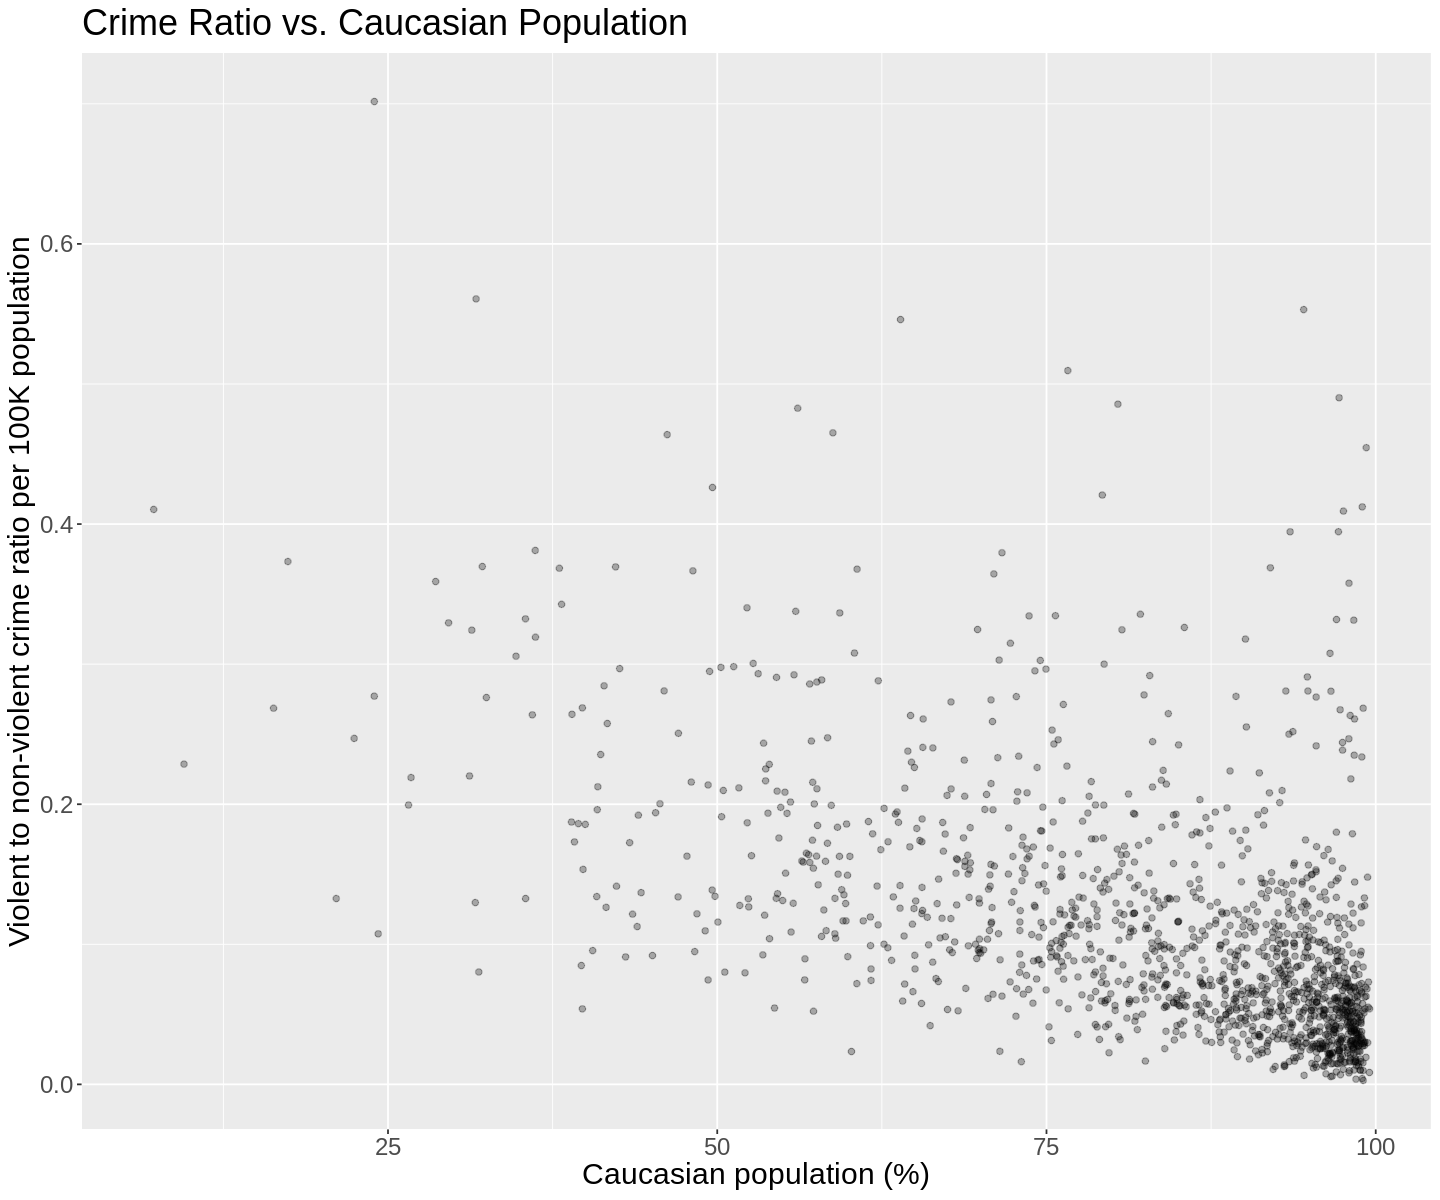

In [22]:
crime_plot_white <- crime_training |>
                    ggplot(aes(x = racePctWhite, y = crime_ratio)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with Caucasian heritage (%)", y = "Violent to non-violent crime ratio per 100K population", title = "Crime Ratio vs. Caucasian Population") +
                    theme(text = element_text(size = 18)) +
                    scale_x_continuous()

crime_plot_white

Warning message:
“Removed 231 rows containing missing values (geom_point).”


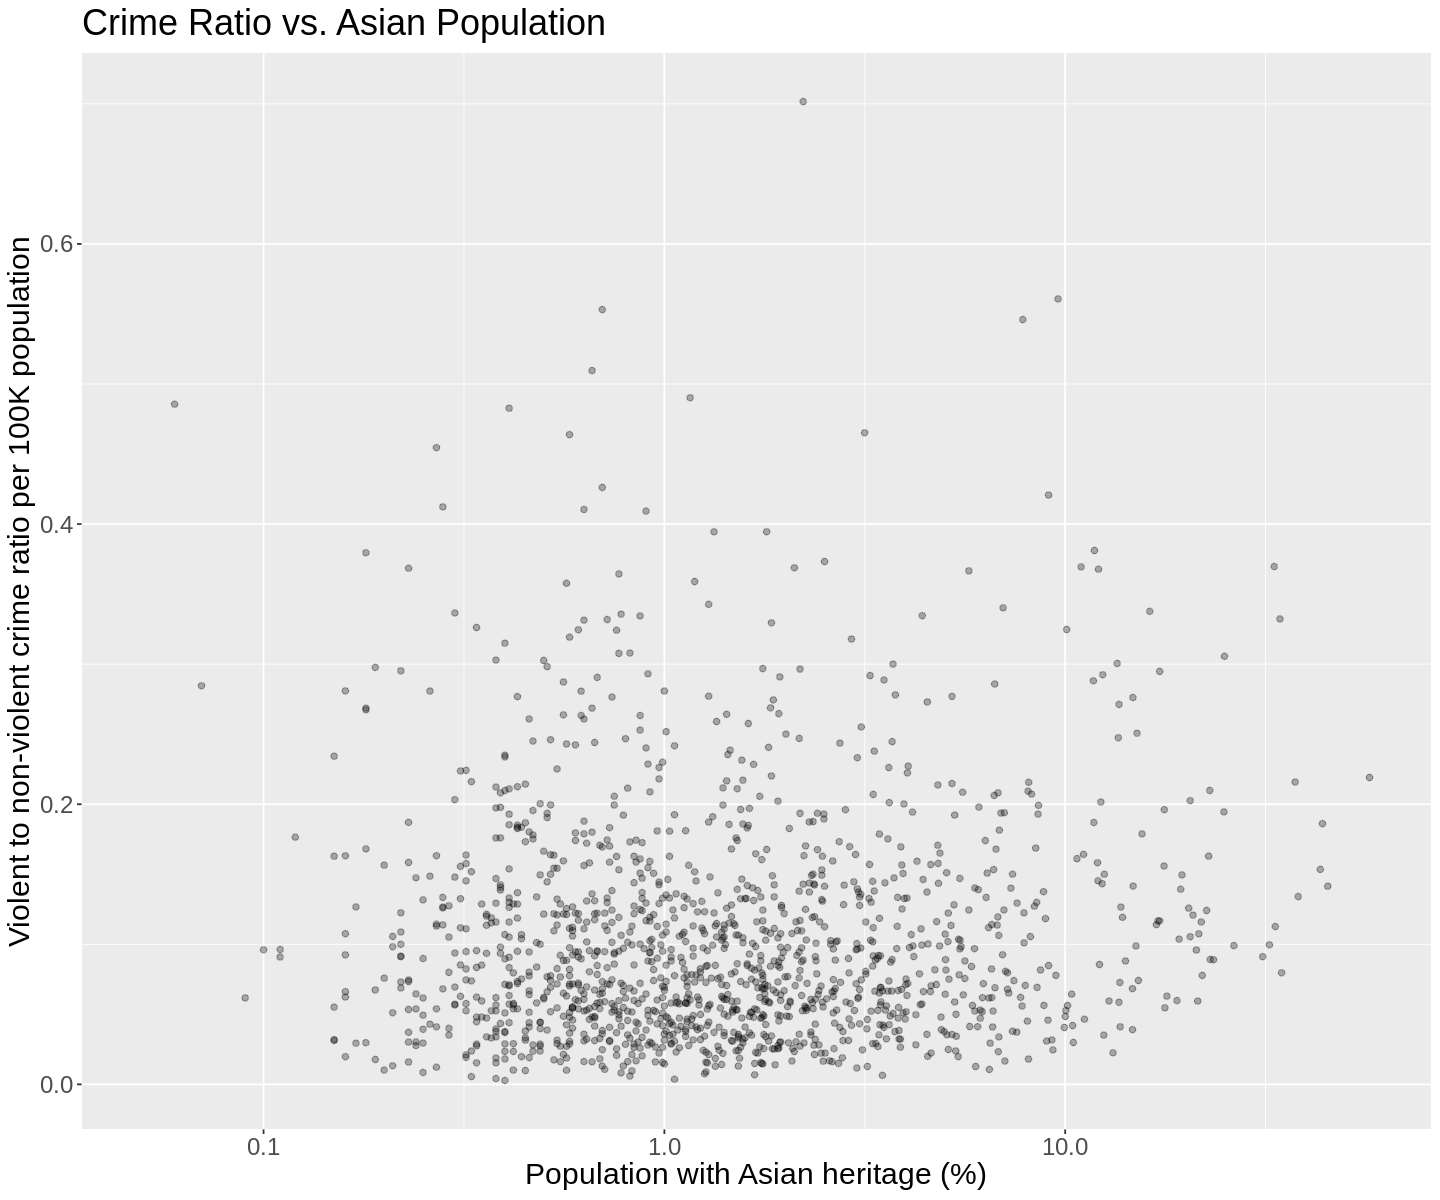

In [16]:
crime_plot_asian <- crime_training |>
                    ggplot(aes(x = racePctAsian, y = crime_ratio)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with Asian heritage (%)", y = "Violent to non-violent crime ratio per 100K population", title = "Crime Ratio vs. Asian Population") +
                    theme(text = element_text(size = 18)) +
                    scale_x_log10()

crime_plot_asian

Warning message:
“Removed 231 rows containing missing values (geom_point).”


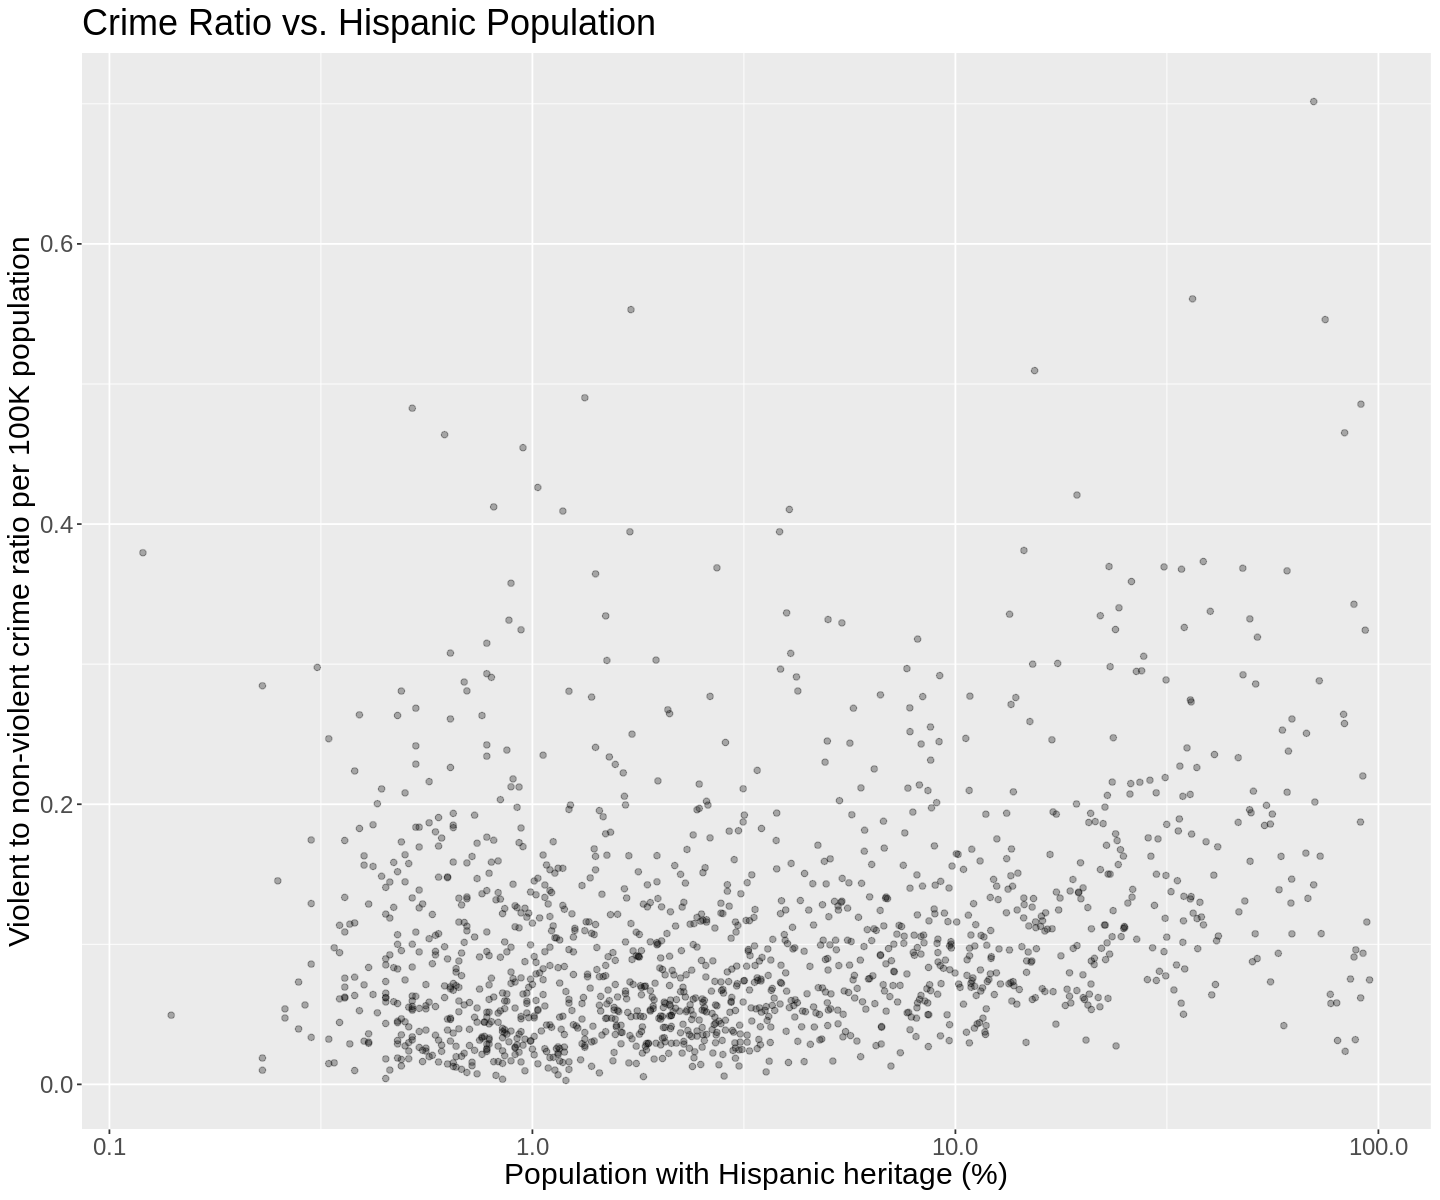

In [23]:
crime_plot_hispanic <- crime_training |>
                    ggplot(aes(x = racePctHisp, y = crime_ratio)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Population with Hispanic heritage (%)", y = "Violent to non-violent crime ratio per 100K population", title = "Crime Ratio vs. Hispanic Population") +
                    theme(text = element_text(size = 18)) +
                    scale_x_log10()

crime_plot_hispanic

EXPECTED OUTCOMES AND SIGNIFICANCE

Previous research has yielded a relationship between race and crime rate, where the white population is the most underrepresented among persons arrested for violent and non-violent crimes (Bonczar & Beck, 1997). Based on these findings, we can hypothesize that the ratio of violent to non-violent crime in predominantly white populations will be lower.



REFERENCES (need to format)

Bonczar, T. P., & Beck, A. J. (1997, March 6). Lifetime likelihood of going to state or Federal Prison. Bureau of Justice Statistics. Retrieved October 28, 2022, from https://bjs.ojp.gov/library/publications/lifetime-likelihood-going-state-or-federal-prison 

Dua, D., & Graff, C. (2019). Communities and crime unnormalized data set. UCI Machine Learning Repository. Retrieved October 27, 2022, from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

Farrell, C. R., & Lee, B. A. (2016, December 26). No-majority communities: Racial diversity and change at the local level. Urban affairs review (Thousand Oaks, Calif.). Retrieved October 27, 2022, from https://pubmed.ncbi.nlm.nih.gov/31814691/

U.S. Census Bureau. U.S. Department of Commerce. (2022, October 13). Retrieved October 27, 2022, from https://www.commerce.gov/bureaus-and-offices/census

Weidner, R. R., & Schultz, J. (2019, August 13). Examining the relationship between U.S. incarceration rates and population health at the county level. SSM - population health. Retrieved October 27, 2022, from https://pubmed.ncbi.nlm.nih.gov/31485477/